# Problem Statement:
###### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

###### Data Description :

###### Undergrad : person is under graduated or not Marital.Status : marital status of a person Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government Work Experience : Work experience of an individual person Urban : Whether that person belongs to urban area or not

In [2]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data
df = pd.read_csv("Fraud_check.csv")

# DATA EXPLORATION

In [4]:
df.shape

(600, 6)

In [5]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [7]:
df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
64,YES,Single,62158,118261,15,NO
3,YES,Single,50190,193264,15,YES
262,NO,Divorced,69540,120415,21,NO
517,NO,Single,19272,195078,26,NO
443,YES,Single,12659,189209,9,NO


### Quick Data Check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
df.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

# DATA PREPROCSEEING

### Identifying Duplicates

In [13]:
df.duplicated().sum()

0

In [14]:
# There is no duplicate value present in above data set

### Identifying Missing Values

In [15]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [16]:
# There is no missing value in above data

### Identifying outliers

<Axes: >

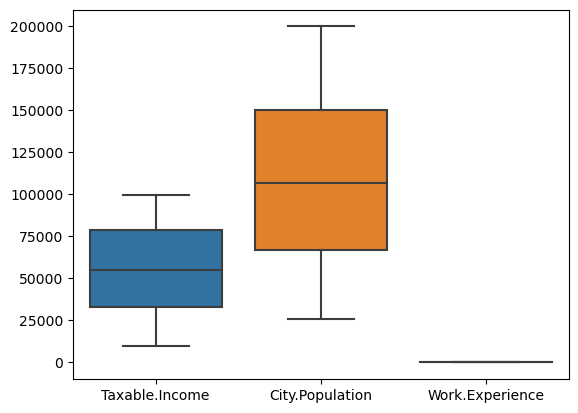

In [17]:
sns.boxplot(data=df)

In [18]:
# With the above box plot we can see there is no outlier present in data

# Making Target Column
-- as per constraint:

-- taxable_income <= 30000 as "Risky" and others are "Good"

In [19]:
def Tagging(income):
    if income <= 30000:
        return "Risky"
    else:
        return "Good"

In [20]:
df['Target'] = df['Taxable.Income'].apply(Tagging)

In [21]:
df['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

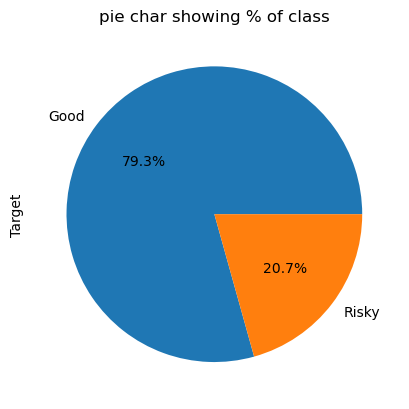

In [22]:
df['Target'].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title('pie char showing % of class')
plt.show()

In [23]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


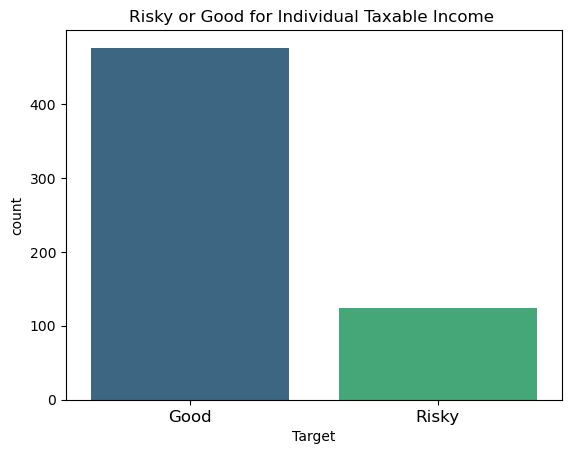

In [24]:
sns.countplot(x='Target', data=df, palette = 'viridis', order=df['Target'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')
plt.show()

1)Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations,

2)i.e one class label has a very high number of observations and the other has a very low number of observations.

3)Here, the class “Good” is called the majority class, and the much smaller in size “Risky” class is called the minority class.

In [25]:
data = df.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'Target'], dtype='object')

# DATA ENCODING

In [26]:
#Creating dummy vairables of the categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Target
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [27]:
data.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

# DATA VISULIZATION

[]

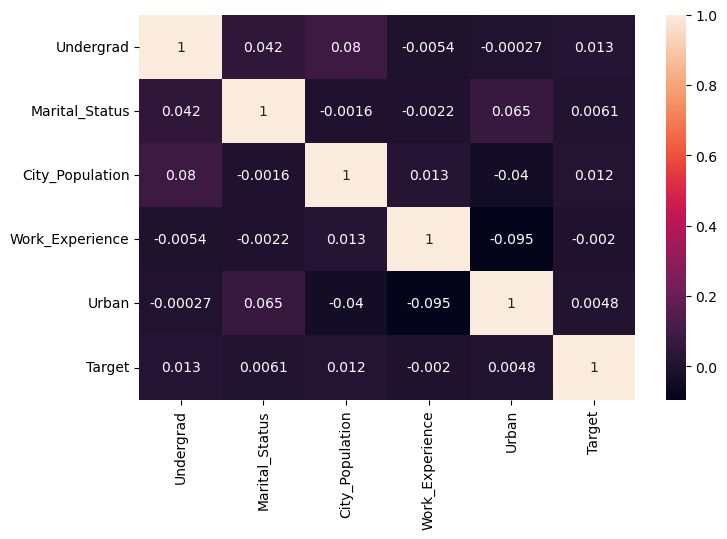

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True)
plt.plot()

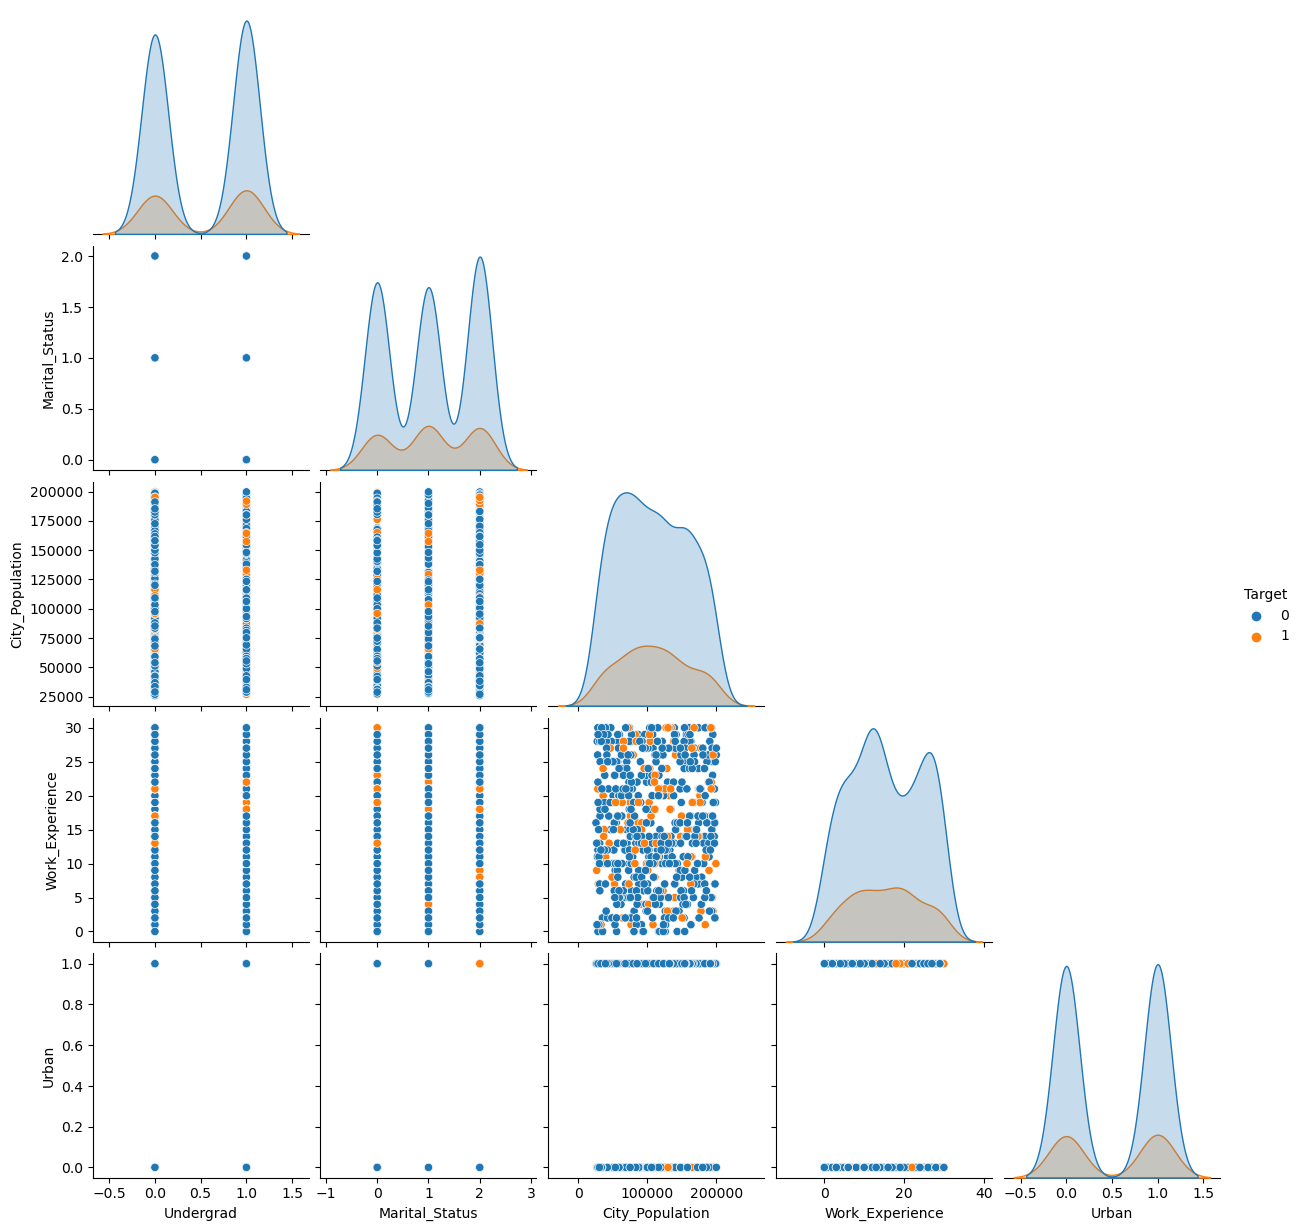

In [29]:
sns.pairplot(data,hue='Target',corner=True);

# DATA SPLITTING

In [31]:
X = data.drop('Target', axis=1)
y = data['Target']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)


Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test: (180,)


In [34]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# MODEL SELECTION

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = model.predict(X_test)
y_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1])

# MODEL EVALUATION

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer, ConfusionMatrixDisplay

In [40]:
accuracy_score(y_test, y_pred)

0.6111111111111112

In [41]:
confusion_matrix(y_test, y_pred)

array([[104,  39],
       [ 31,   6]], dtype=int64)

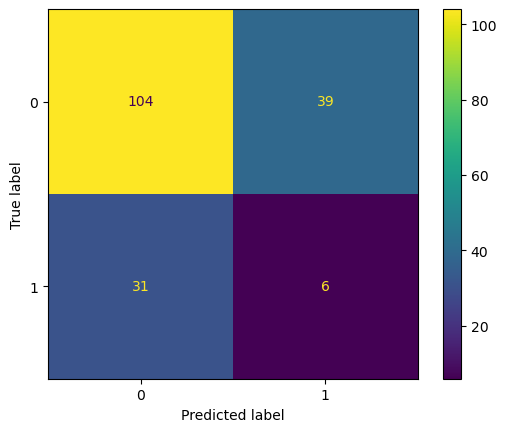

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot();

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       143
           1       0.13      0.16      0.15        37

    accuracy                           0.61       180
   macro avg       0.45      0.44      0.45       180
weighted avg       0.64      0.61      0.62       180



In [44]:
model.feature_importances_

array([0.04447282, 0.04226151, 0.5803267 , 0.30479337, 0.0281456 ])

In [45]:
X.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban'],
      dtype='object')

In [46]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Undergrad,0.044473
Marital_Status,0.042262
City_Population,0.580327
Work_Experience,0.304793
Urban,0.028146


In [47]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Urban,0.028146
Marital_Status,0.042262
Undergrad,0.044473
Work_Experience,0.304793
City_Population,0.580327


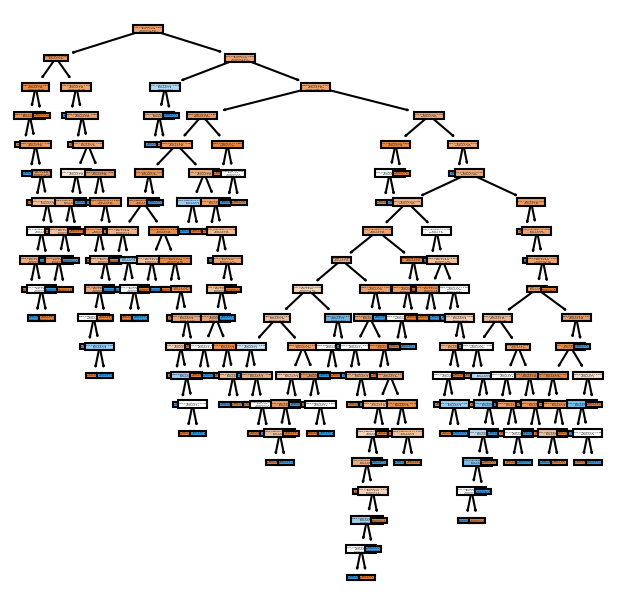

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(5,5),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

# Handling Imbalance Dataset - SMOTE

In [50]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [51]:
counter = Counter(y_train)
print('Before', counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 333})


# Hyper Parameter Tunning

In [52]:
def report_model(model):
    """
    Generates and prints various reports to evaluate a trained model.
    Args:
        model: The trained model object.
    """

    # Make predictions on the test set
    model_preds = model.predict(X_test)

    # Calculate accuracy scores on training and test sets
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Print training and test accuracy scores
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print()

    # Generate and print confusion matrix with annotations
    print("Confusion Matrix:")
    print(sns.heatmap(confusion_matrix(y_test, model_preds), annot=True))

    # Generate and print classification report
    print("Classification Report:")
    print(classification_report(y_test, model_preds))
    print()

    # Create a figure for plotting the decision tree
    plt.figure(figsize=(12, 8), dpi=150)

    # Plot the decision tree with filled nodes and feature names
    plot_tree(model, filled=True, feature_names=X.columns.tolist());

1)The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

2)The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

3)max_features : int, float or {"auto", "sqrt", "log2"}, default=None The number of features to consider when looking for the best split

Training Accuracy: 0.7262
Test Accuracy: 0.6889

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       143
           1       0.15      0.11      0.12        37

    accuracy                           0.69       180
   macro avg       0.47      0.47      0.47       180
weighted avg       0.65      0.69      0.67       180




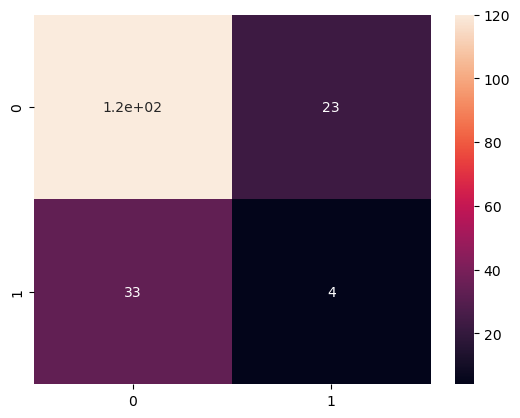

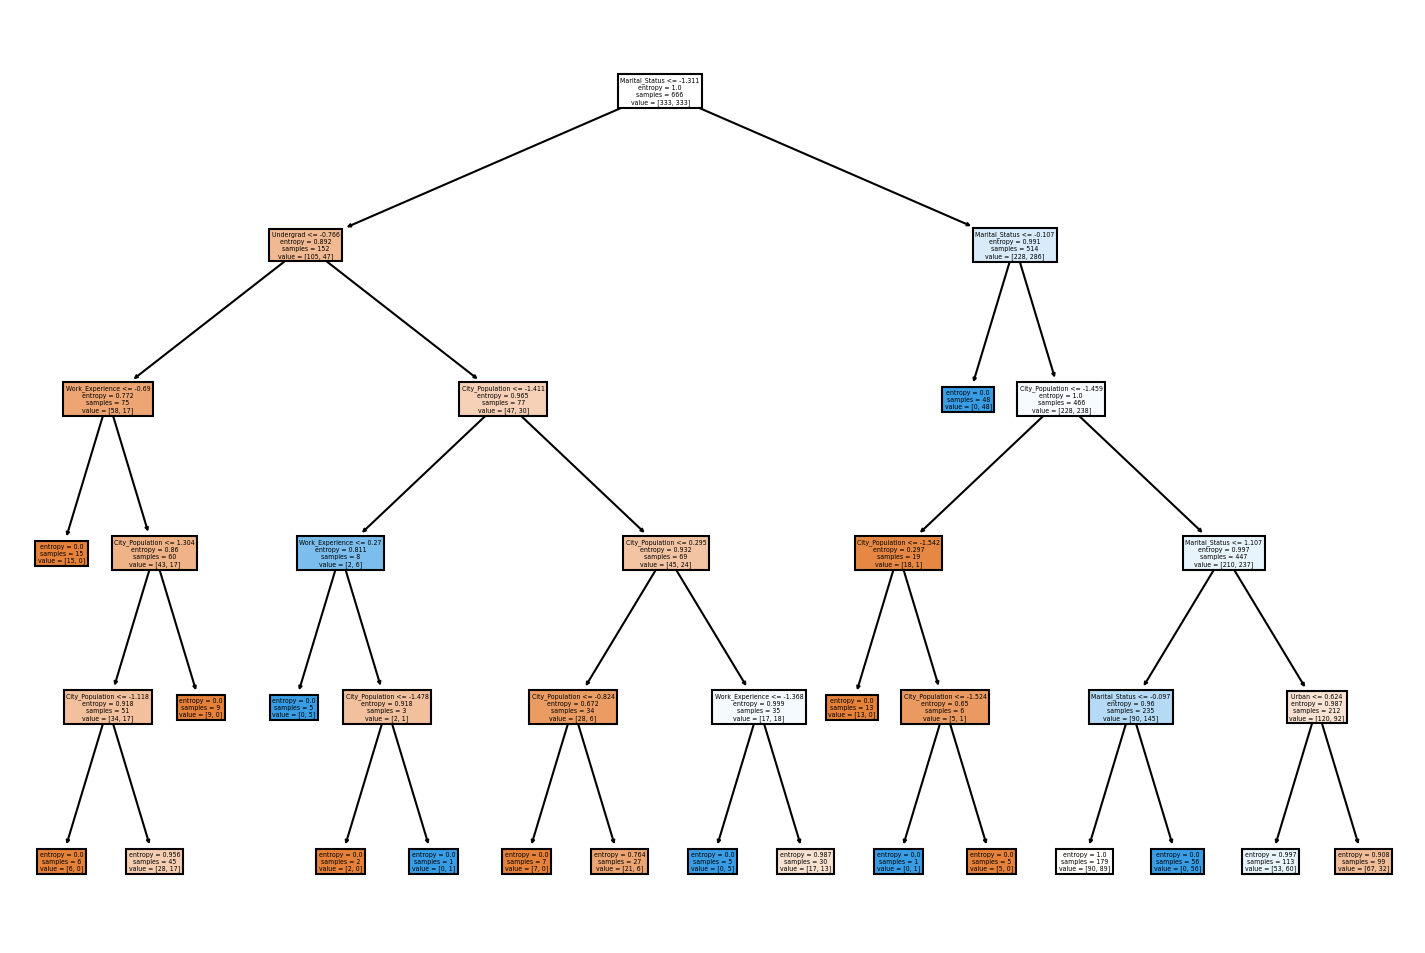

In [54]:
pruned_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
pruned_tree.fit(X_train_sm, y_train_sm)
report_model(pruned_tree)

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"] ,
              'max_depth': [5,6,7,8,9,10],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2,3]}

grid=GridSearchCV(dtc,param_grid,scoring=scorer,cv=10,n_jobs=-1,verbose=3)

In [57]:
grid.fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [58]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10)

Training Accuracy: 0.8738
Test Accuracy: 0.6833

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       143
           1       0.17      0.14      0.15        37

    accuracy                           0.68       180
   macro avg       0.48      0.48      0.48       180
weighted avg       0.66      0.68      0.67       180




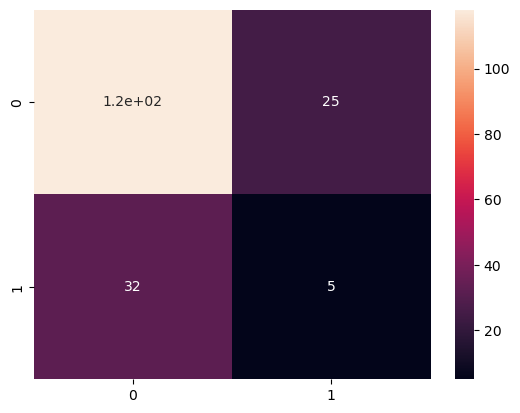

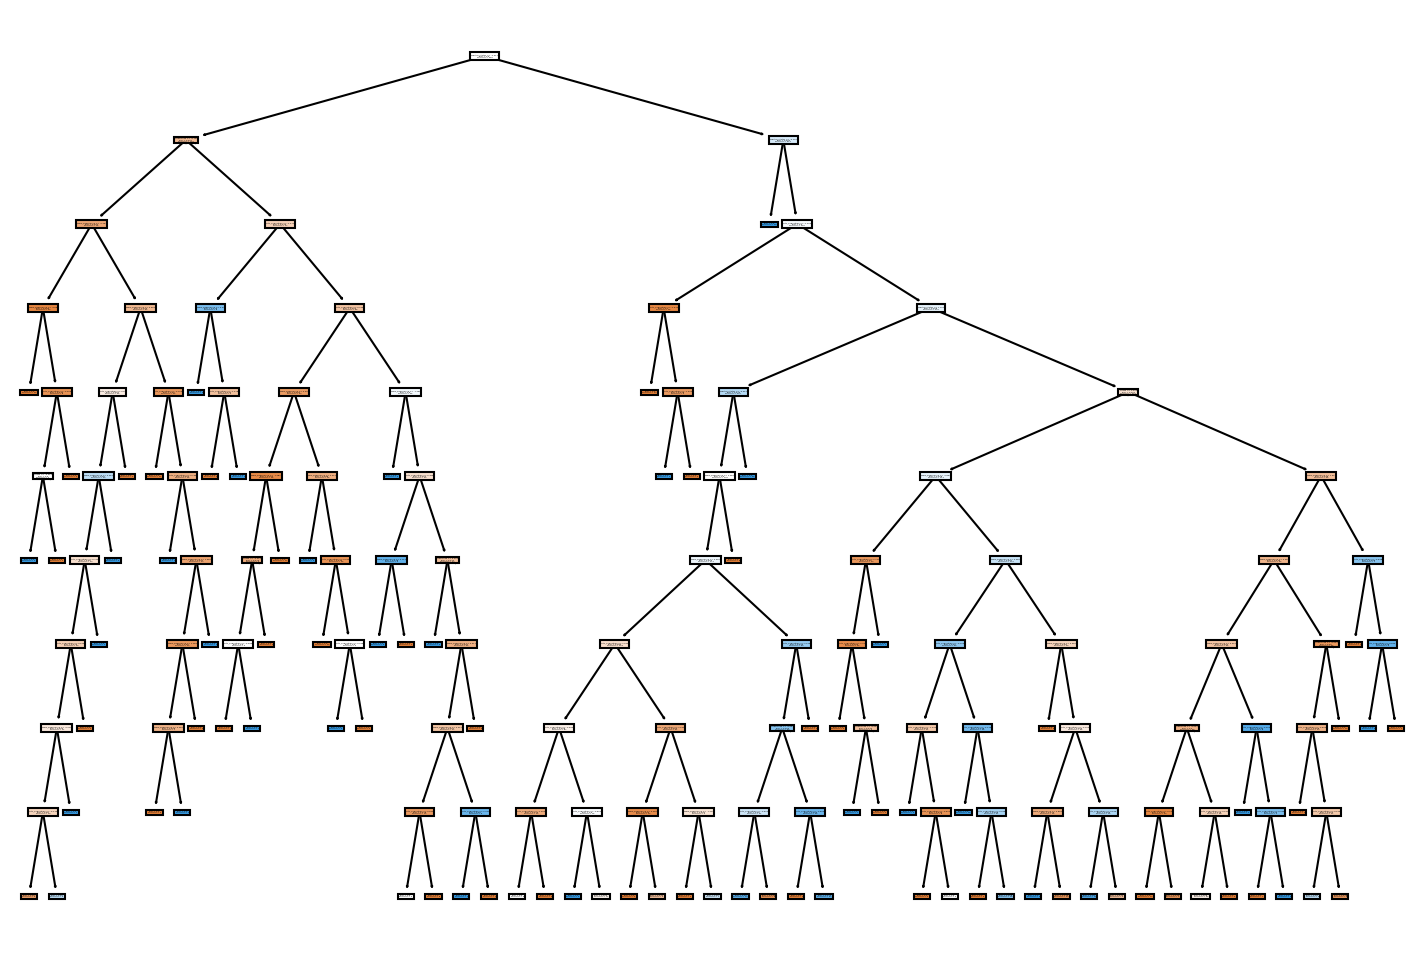

In [59]:
report_model(grid.best_estimator_)

In [60]:
dtc = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)

param_grid = {'criterion' : ["gini", "entropy"],
              'max_leaf_nodes': [5,6,7,8,9,10],
              'min_samples_split': [2, 5]}

grid = GridSearchCV(dtc, param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=3)

In [61]:
grid.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [62]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=8)

Training Accuracy: 0.7762
Test Accuracy: 0.7333

Confusion Matrix:
Axes(0.125,0.11;0.62x0.77)
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       143
           1       0.08      0.03      0.04        37

    accuracy                           0.73       180
   macro avg       0.43      0.47      0.44       180
weighted avg       0.64      0.73      0.68       180




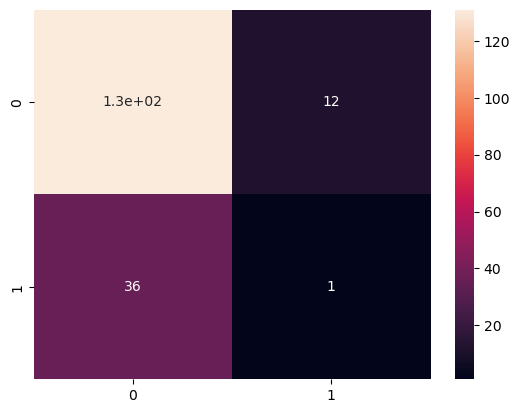

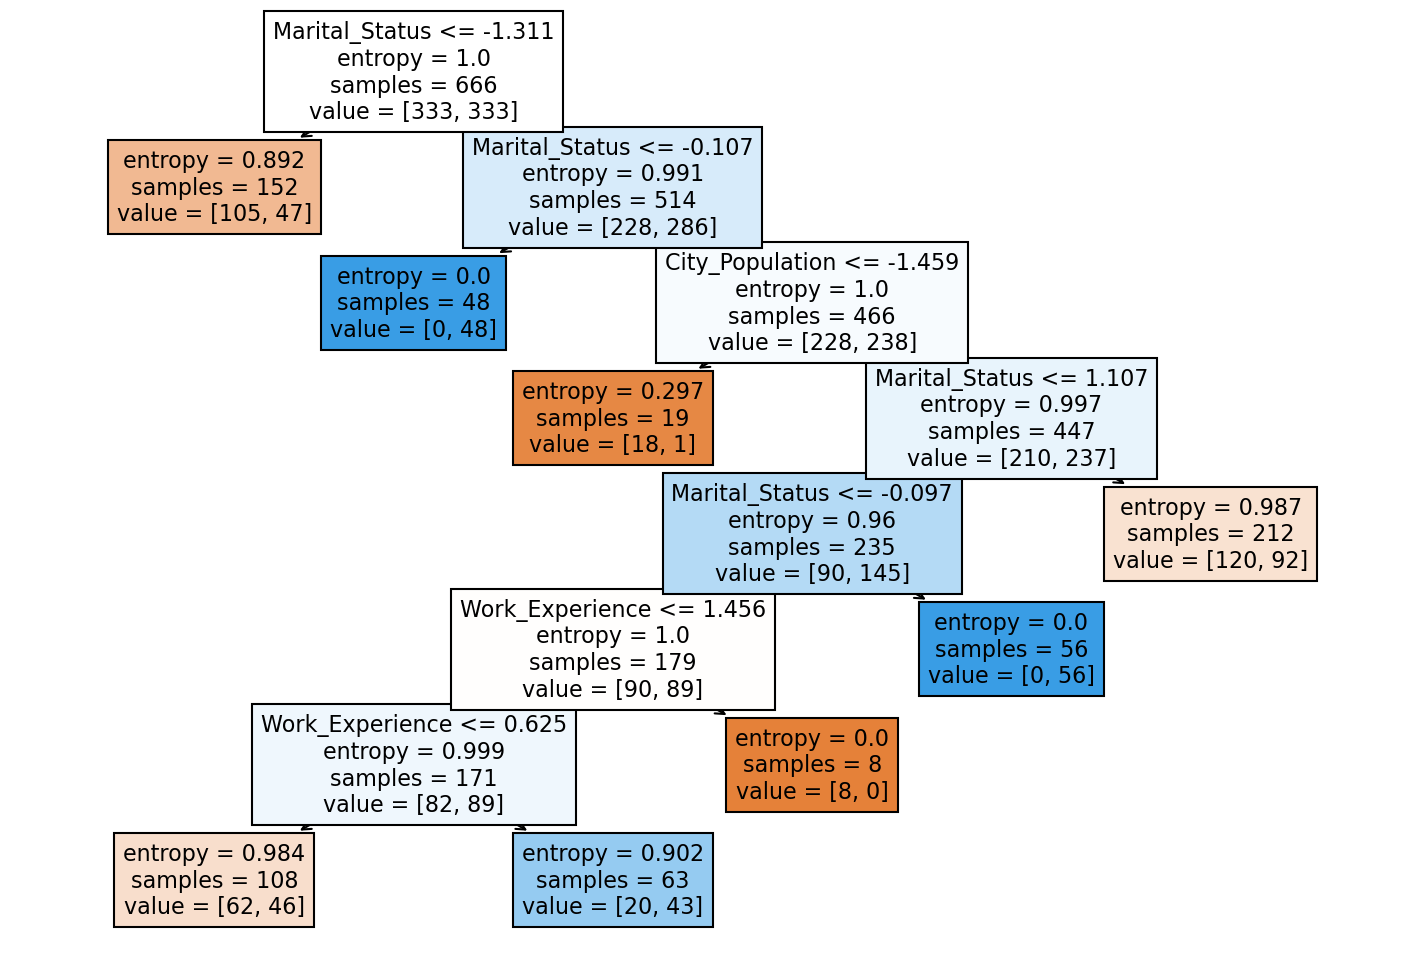

In [63]:
report_model(grid.best_estimator_)

# MODEL DEPLOYMENT

In [64]:
# from joblib import dump,load

In [65]:
# dump(final_model, 'dtregmodel.joblib')